RandomForestClassifier

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# 데이터 로드
df = pd.read_csv("merged_data_final.csv")
X = df.drop('final_result', axis=1)
y = df['final_result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=7, random_state=0)

# 학습
rf_clf.fit(X_train, y_train)

y_pred_train = rf_clf.predict(X_train)
acc_score_train = accuracy_score(y_train, y_pred_train)
print('학습 점수:', acc_score_train)

y_pred_test = rf_clf.predict(X_test)
acc_score_test = accuracy_score(y_test, y_pred_test)
print('테스트 평가 점수:', acc_score_test)

학습 점수: 0.9297676931388439
테스트 평가 점수: 0.9296646043633996


---
LogisticRegression

In [12]:
# 데이터셋 분리 및 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 특성-라벨 데이터 분리
df = pd.read_csv("merged_data_final.csv")
X = df.drop('final_result', axis=1)
y = df['final_result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# 모델 학습 및 평가
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train_scaled, y_train)
lr_clf.score(X_train_scaled, y_train), lr_clf.score(X_test_scaled, y_test)

(0.929671484499308, 0.9278588555696989)

In [15]:
y_pred_test = lr_clf.predict(X_test)
acc_score_test = accuracy_score(y_test, y_pred_test)
print('테스트 평가 점수:', acc_score_test)

테스트 평가 점수: 0.9280956750836269


/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


---
xgboost

In [23]:
from xgboost import XGBClassifier   # xgboost에서는 sklearn과 비슷한 api 제공
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 특성-라벨 데이터 분리
df = pd.read_csv("merged_data_final.csv")
X = df.drop('final_result', axis=1)
y = df['final_result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

xgb_clf = XGBClassifier(
    n_estimators=100,
    max_depth=3, 
    learning_rate=0.1,
    random_state=0
)
xgb_clf.fit(X_train, y_train)

y_pred_train = xgb_clf.predict(X_train)
y_pred_test = xgb_clf.predict(X_test)

print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

print(classification_report(y_test, y_pred_test))

0.9319656905190086
0.9293685799709897
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     31352
           1       0.60      0.05      0.09      2429

    accuracy                           0.93     33781
   macro avg       0.77      0.52      0.53     33781
weighted avg       0.91      0.93      0.90     33781



---
앙상블

In [49]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
xgb_clf = XGBClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('lr_clf', lr_clf),
        ('dt_clf', dt_clf),
        ('xgb_clf', xgb_clf)
    ],
    voting='hard'   # 기본값
)

# 특성-라벨 데이터 분리
df = pd.read_csv("merged_data_final.csv")
X = df.drop('final_result', axis=1)
y = df['final_result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# 앙상블 모델 학습
voting_clf.fit(X_train, y_train)

# 예측 및 평가
y_pred_train = voting_clf.predict(X_train)
acc_score_train = accuracy_score(y_train, y_pred_train)
print("학습 점수: ", acc_score_train)

y_pred_test = voting_clf.predict(X_test)
acc_score_test = accuracy_score(y_test, y_pred_test)
print("테스트 평가 점수: ", acc_score_test)

print(classification_report(y_test, y_pred_test))

# # hard voting 작동 원리 == 다수결
# start, end = 10, 50

# voting_clf_pred = voting_clf.predict(X_test[start:end])
# print('앙상블 예측값: ', voting_clf_pred)

# for classifier in [xgb_clf, lr_clf, dt_clf]:
#     classifier.fit(X_train, y_train)
#     pred = classifier.predict(X_test)
#     acc_score = accuracy_score(y_test, pred)

#     class_name = classifier.__class__.__name__  # 클래스의 이름 속성
#     print(f'{class_name} 개별 정확도: {acc_score: .4f}')
#     print(f'{class_name} 예측값: {pred[start:end]}')
    

/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


학습 점수:  0.9630262797599224
테스트 평가 점수:  0.9445842337408602
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     31352
           1       0.90      0.26      0.40      2429

    accuracy                           0.94     33781
   macro avg       0.92      0.63      0.69     33781
weighted avg       0.94      0.94      0.93     33781



---

In [28]:
# 데이터셋 분리 및 정규화
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 특성-라벨 데이터 분리
df = pd.read_csv("merged_data_final.csv")
X = df.drop('final_result', axis=1)
y = df['final_result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# 다른 평가 지표
from sklearn.metrics import mean_squared_error, root_mean_squared_error, mean_absolute_error, r2_score

def evaluate_regression(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}')


In [30]:
# 다항회귀 (훈련, 평가, 다른 평가 지표들로 평가)
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([
    # (이름, 객체)
    ('poly', PolynomialFeatures(include_bias=False, degree=2)),
    ('lr', LinearRegression())
])

model.fit(X_train, y_train)
print(model.score(X_train, y_train), model.score(X_test, y_test))

y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
evaluate_regression(y_test, y_pred_test)
evaluate_regression(y_train, y_pred_train)

0.12094644803034382 0.1031127789882359
MSE: 0.05985295519481376, RMSE: 0.24464863620060048, MAE: 0.12388975497063279, R2: 0.1031127789882359
MSE: 0.05759761274511194, RMSE: 0.23999502650078383, MAE: 0.12142513496328294, R2: 0.12094644803034382


---
oversampling

Original Class Distribution: Counter({0: 156950, 1: 11954})


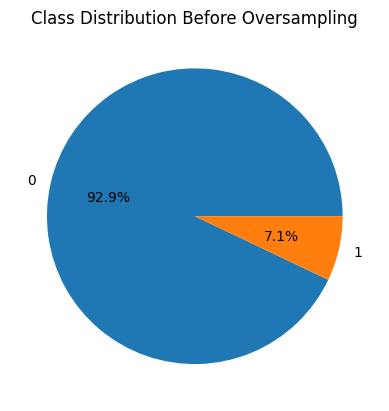

In [35]:
import pandas as pd
from collections import Counter

# 특성-라벨 데이터 분리
df = pd.read_csv("merged_data_final.csv")
X = df.drop('final_result', axis=1)
y = df['final_result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


# 클래스 분포 확인
class_dist = Counter(y)
print(f"Original Class Distribution: {class_dist}")

# 시각화
import matplotlib.pyplot as plt
plt.pie(class_dist.values(), labels=class_dist.keys(), autopct='%1.1f%%')
plt.title('Class Distribution Before Oversampling')
plt.show()

In [50]:
# 수정된 코드 (데이터 누수 방지 버전)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

df = pd.read_csv("merged_data_final.csv")
X = df.drop('final_result', axis=1)
y = df['final_result']
# 1. 원본 데이터 분할 (SMOTE 적용 전)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y,  # 계층적 분할
    random_state=42
)

# 2. 파이프라인 구성
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', voting_clf)  # VotingClassifier 객체
])

# 3. 학습 및 평가   
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("SMOTE 적용 후 성능:")
print(classification_report(y_test, y_pred))

/opt/anaconda3/envs/pystudy_env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SMOTE 적용 후 성능:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     31390
           1       0.41      0.44      0.42      2391

    accuracy                           0.91     33781
   macro avg       0.68      0.70      0.69     33781
weighted avg       0.92      0.91      0.92     33781



---
## 앙상블 + 오버샘플링

In [57]:
lr_clf = LogisticRegression()
dt_clf = DecisionTreeClassifier()
xgb_clf = XGBClassifier()

voting_clf = VotingClassifier(
    estimators=[
        ('lr_clf', lr_clf),
        ('dt_clf', dt_clf),
        ('xgb_clf', xgb_clf)
    ],
    voting='hard'   # 기본값
)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', voting_clf)  # VotingClassifier 객체
])

# 특성-라벨 데이터 분리
df = pd.read_csv("merged_data_final.csv")
X = df.drop('final_result', axis=1)
y = df['final_result']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Before SMOTE:{np.bincount(y)}")
voting_clf.fit(X_train_scaled, y_train)
y_pred = voting_clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

####################################################################################

smote=SMOTE(random_state=42)
X_resample,y_resample = smote.fit_resample(X_train_scaled,y_train)

print(f"After SMOTE:{np.bincount(y_resample)}")
print(X.shape,y.shape)
print(X_resample.shape,y_resample.shape)

pipeline.fit(X_resample, y_resample)
y_pred = pipeline.predict(X_test_scaled)
print(classification_report(y_test,y_pred))

Before SMOTE:[156950  11954]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     31390
           1       0.94      0.28      0.43      2391

    accuracy                           0.95     33781
   macro avg       0.94      0.64      0.70     33781
weighted avg       0.95      0.95      0.93     33781

After SMOTE:[125560 125560]
(168904, 34) (168904,)
(251120, 34) (251120,)
              precision    recall  f1-score   support

           0       0.96      0.95      0.96     31390
           1       0.44      0.52      0.47      2391

    accuracy                           0.92     33781
   macro avg       0.70      0.73      0.72     33781
weighted avg       0.93      0.92      0.92     33781

